In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


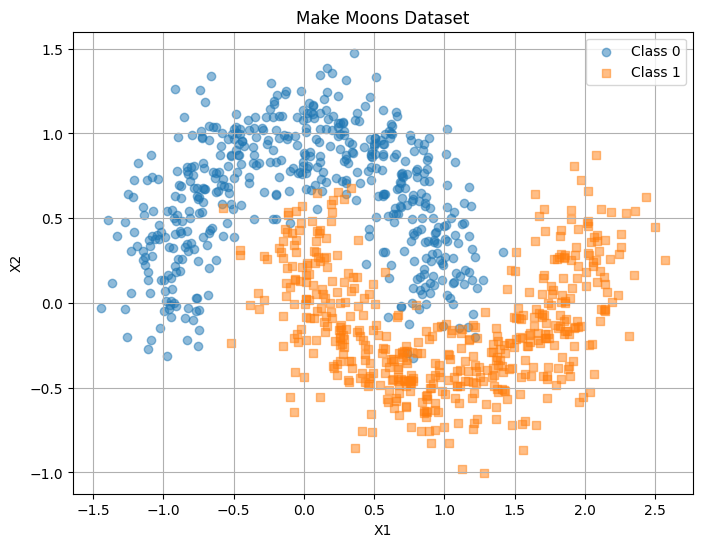

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', marker='o', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', marker='s', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Make Moons Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(kernel)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

linear
0.855
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       100
           1       0.85      0.86      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

poly
0.85
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       100
           1       0.84      0.86      0.85       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

rbf
0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.9

In [ ]:
def plot_decision_boundaries(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.brg)
    if contour:
        plt.contour(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "o", alpha=alpha, label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "s", alpha=alpha, label="Class 1")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.axis(axes)
    plt.legend(loc="lower right", fontsize=14)

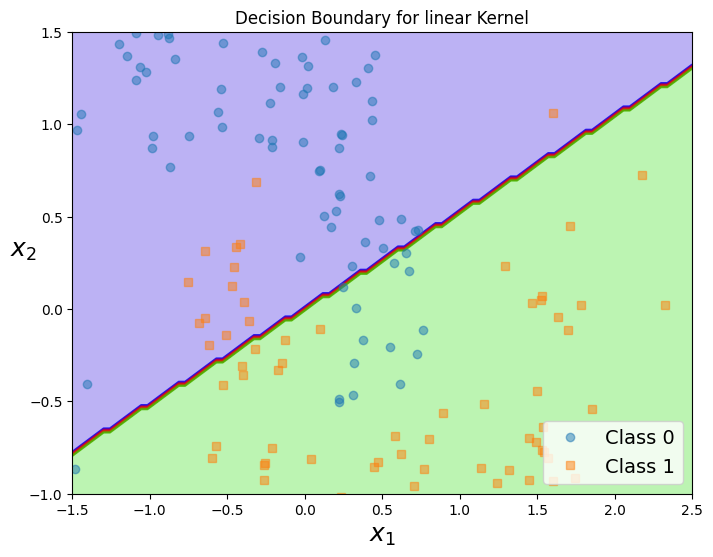

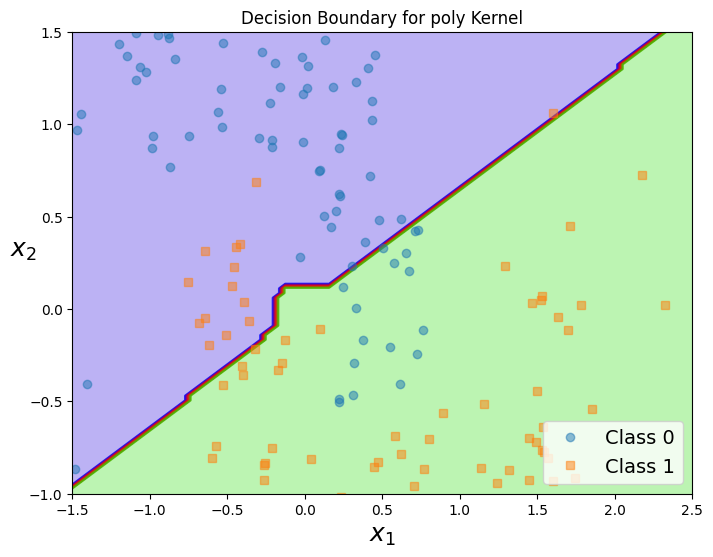

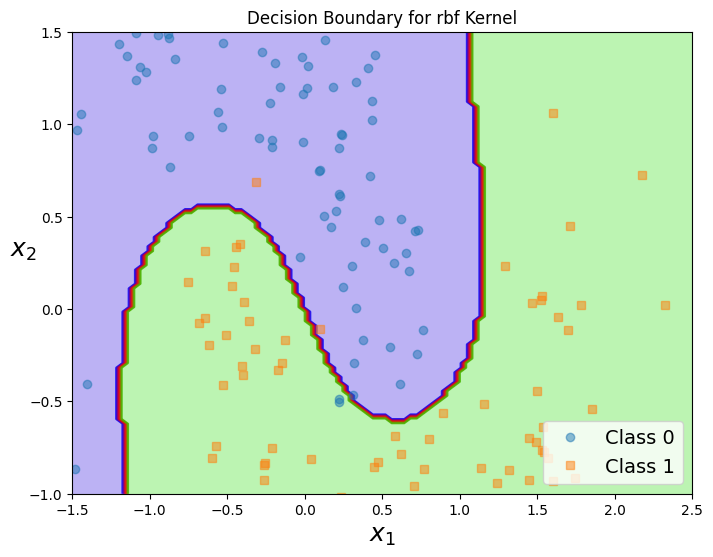

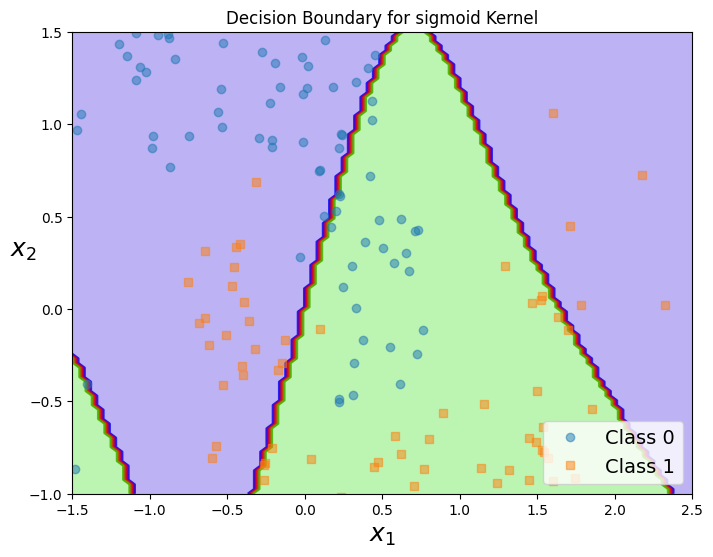

In [ ]:
for kernel in kernels:
    plt.figure(figsize=(8, 6))
    clf = SVC(kernel=kernel)
    clf.fit(X_train_scaled, y_train)
    plot_decision_boundaries(clf, X_test_scaled, y_test)
    plt.title(f'Decision Boundary for {kernel} Kernel')
    plt.show()

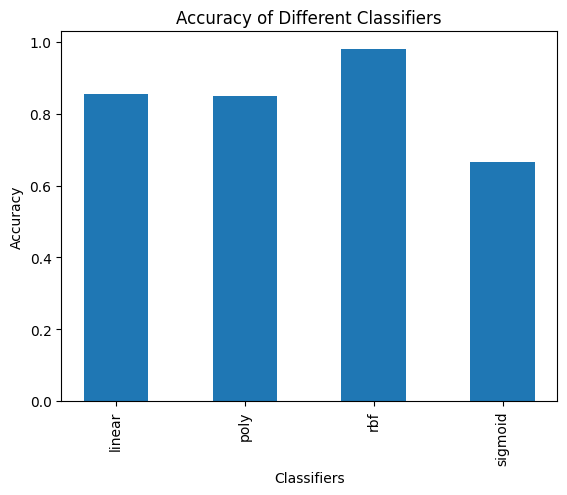

In [ ]:
plt.bar(kernels, accuracies, width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

In [ ]:
data2 = pd.read_csv('/content/winequality-red.csv')
data2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
data2['quality'].unique()
data2['Outcome'] = data2['quality'].apply(lambda x: 1 if x >= 6 else 0)
data2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Outcome  
0      9.4        5        0  
1      9.8        5        0  
2      9.8        5        0  
3      9.8        6        1  
4      9.4        5        0

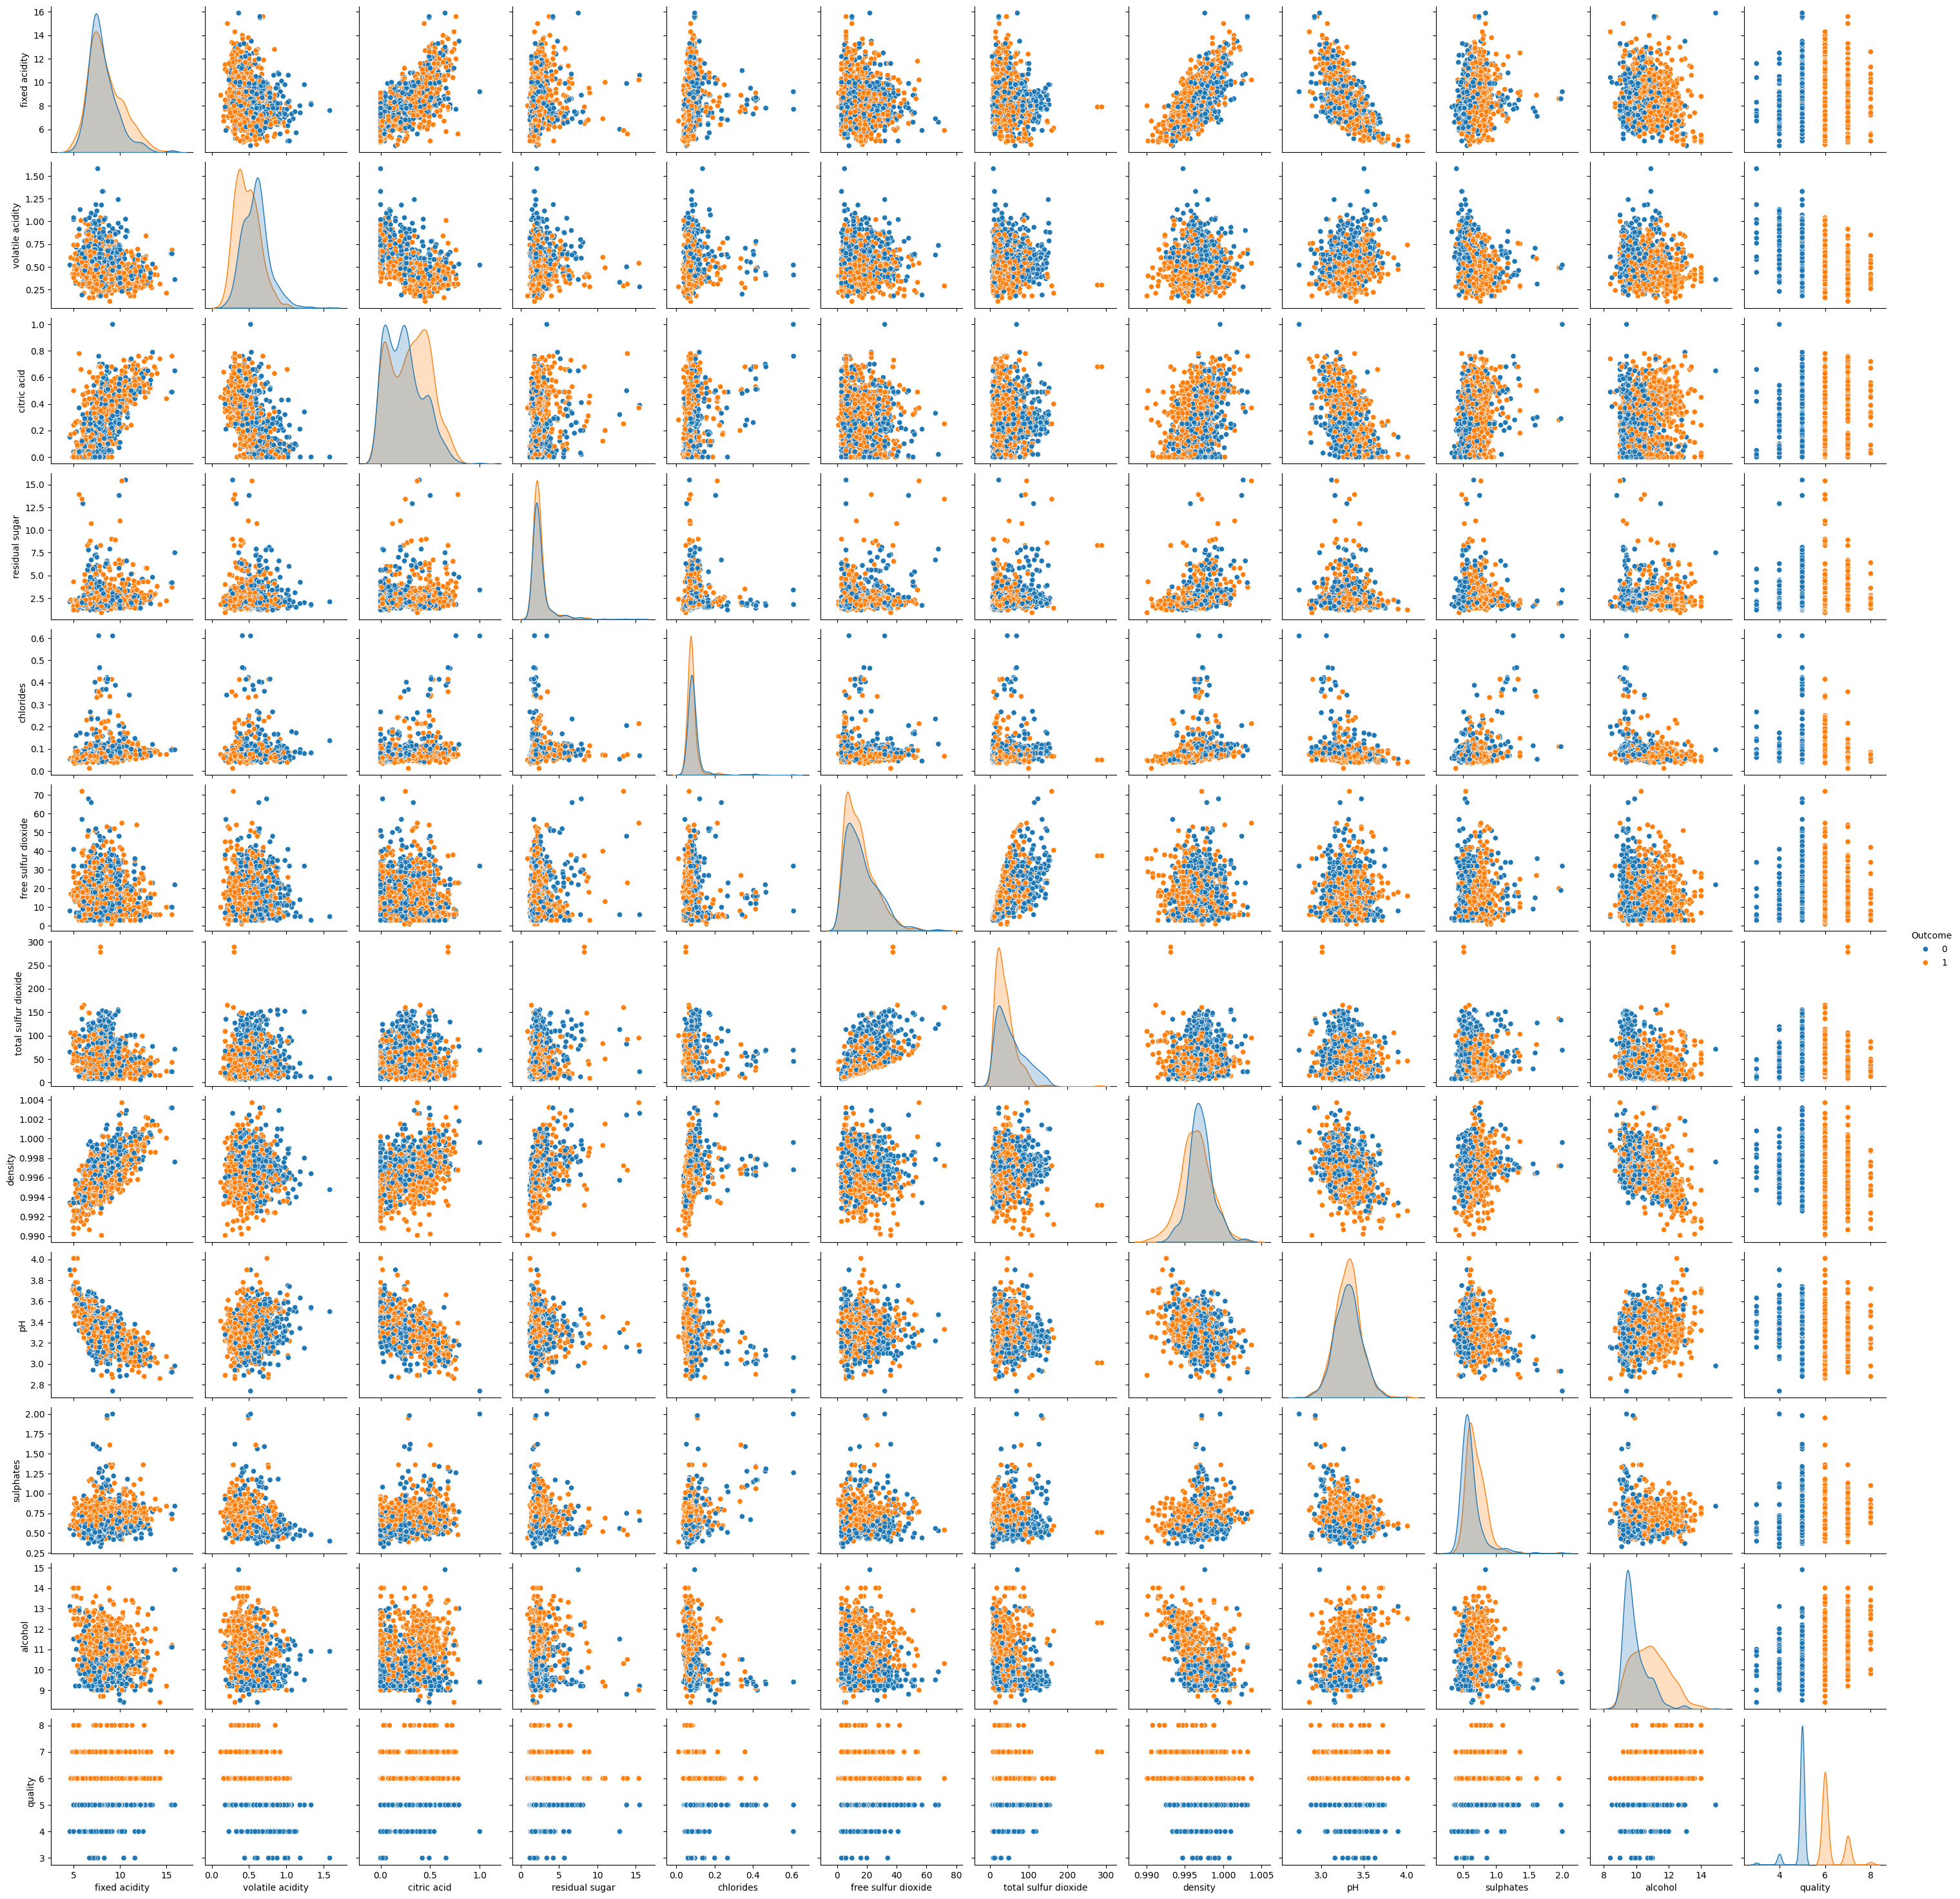

In [ ]:
import seaborn as sns
sns.pairplot(data2, hue='Outcome')

In [ ]:
X = data2[['density', 'fixed acidity']]
y = data2['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(kernel)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

linear
0.628125
              precision    recall  f1-score   support

           0       0.57      0.67      0.61       141
           1       0.70      0.59      0.64       179

    accuracy                           0.63       320
   macro avg       0.63      0.63      0.63       320
weighted avg       0.64      0.63      0.63       320

poly
0.578125
              precision    recall  f1-score   support

           0       0.80      0.06      0.11       141
           1       0.57      0.99      0.72       179

    accuracy                           0.58       320
   macro avg       0.69      0.52      0.41       320
weighted avg       0.67      0.58      0.45       320

rbf
0.625
              precision    recall  f1-score   support

           0       0.56      0.67      0.61       141
           1       0.69      0.59      0.64       179

    accuracy                           0.62       320
   macro avg       0.63      0.63      0.62       320
weighted avg       0.64      0.62 

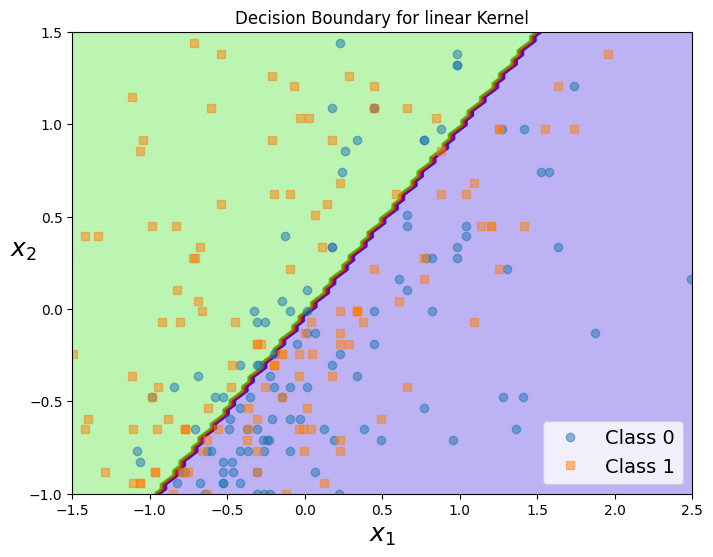

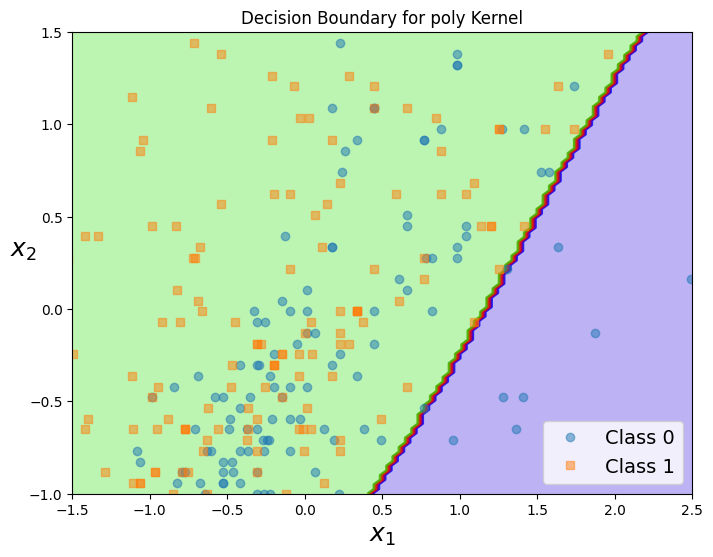

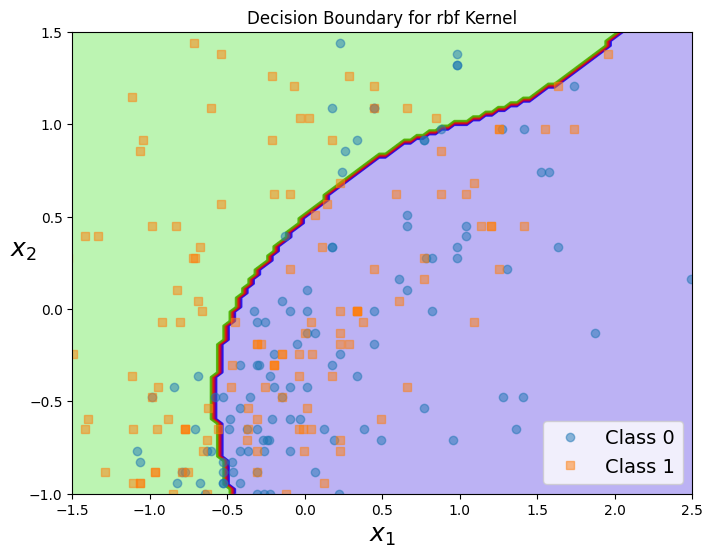

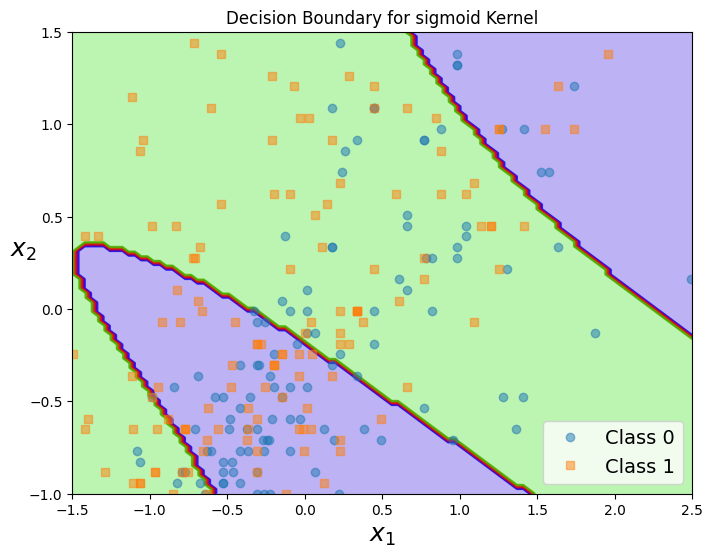

In [ ]:
for kernel in kernels:
    plt.figure(figsize=(8, 6))
    clf = SVC(kernel=kernel)
    clf.fit(X_train_scaled, y_train)
    plot_decision_boundaries(clf, X_test_scaled, y_test)
    plt.title(f'Decision Boundary for {kernel} Kernel')
    plt.show()

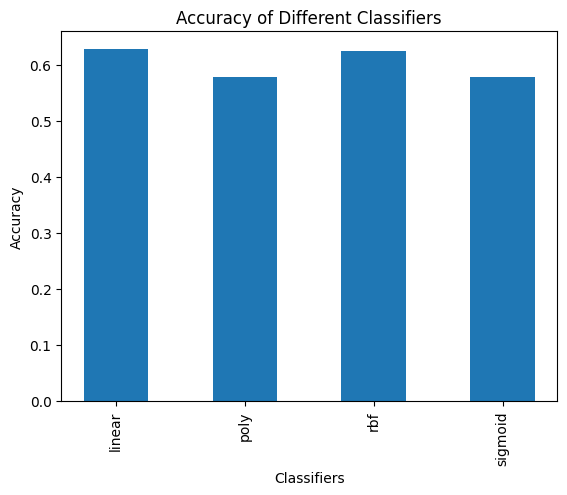

In [ ]:
plt.bar(kernels, accuracies, width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(kernel)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

linear
0.975
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

poly
0.9638888888888889
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        28
           2       1.00      0.94      0.

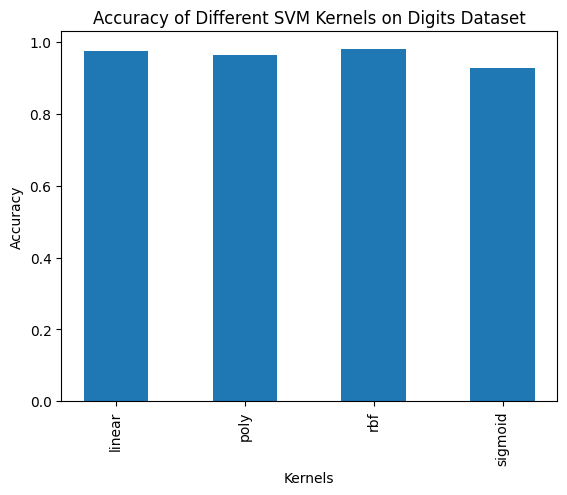

In [ ]:
plt.bar(kernels, accuracies, width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Digits Dataset')
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mse = []
for kernel in kernels:
  clf = SVR(kernel=kernel)
  clf.fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_test_scaled)
  print(kernel)
  mse.append(mean_squared_error(y_test, y_pred))
  print(mean_squared_error(y_test, y_pred))
  print(r2_score(y_test, y_pred))

linear
3.3582006744124215
0.565260188526697
poly
2.0902066314533987
0.7294098462244841
rbf
1.0423268878440706
0.865064348843843
sigmoid
8.971533063752693
-0.161420347056769


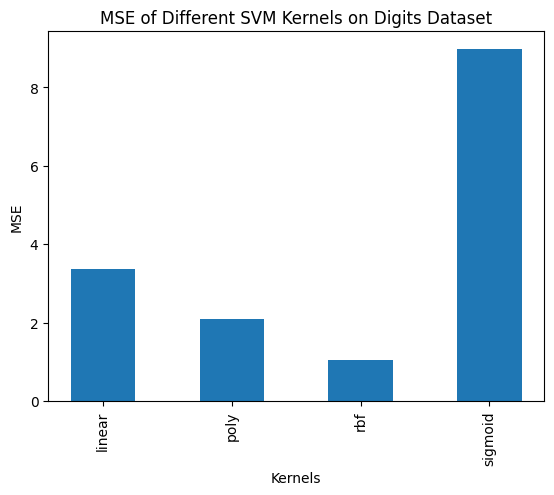

In [ ]:
plt.bar(kernels, mse, width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Kernels')
plt.ylabel('MSE')
plt.title('MSE of Different SVM Kernels on Digits Dataset')
plt.show()